### Feature Selection

### 3 Feature selection techniques that are easy to use and also gives good results.

1. Univariate Selection

2. Feature Importance

3. Correlation Matrix with Heatmap

### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df =pd.read_csv("G:/Stuff/Feature-Selection-techniques-master/mobile_handset.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Independent and Dependent Features.
X= df.iloc[:,:20]
Y= df.iloc[:,-1]

In [8]:
# Apply SelectKBest class to extract top 10 best features
bestFeatures =SelectKBest(score_func=chi2,k=10)
fit =bestFeatures.fit(X,Y)

In [9]:
dfScores =pd.DataFrame(fit.scores_)
dfFeatures =pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfFeatures,dfScores],axis=1,)
featureScores.columns =['features','score']
featureScores

,features,score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
featureScores.nlargest(10,'score')

,features,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance.

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt

In [22]:
model =ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [25]:
model.feature_importances_

array([0.06159678, 0.0202589 , 0.03380239, 0.01978685, 0.03350946,
       0.01781987, 0.03576314, 0.03385001, 0.03647904, 0.03317   ,
       0.03389743, 0.04808935, 0.04912825, 0.38522957, 0.03499423,
       0.03382076, 0.03576787, 0.0143734 , 0.01865782, 0.02000488])

In [41]:
feature_importance =pd.Series(model.feature_importances_,index=X.columns)

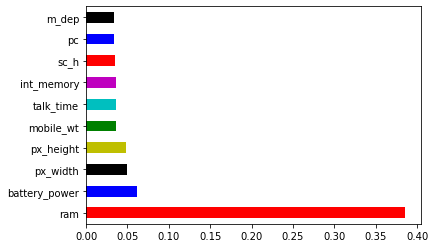

In [48]:
feature_importance.nlargest(10).plot(kind='barh',color=['r','b','k','y','g','c','m'])

### Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [55]:
import seaborn as sns

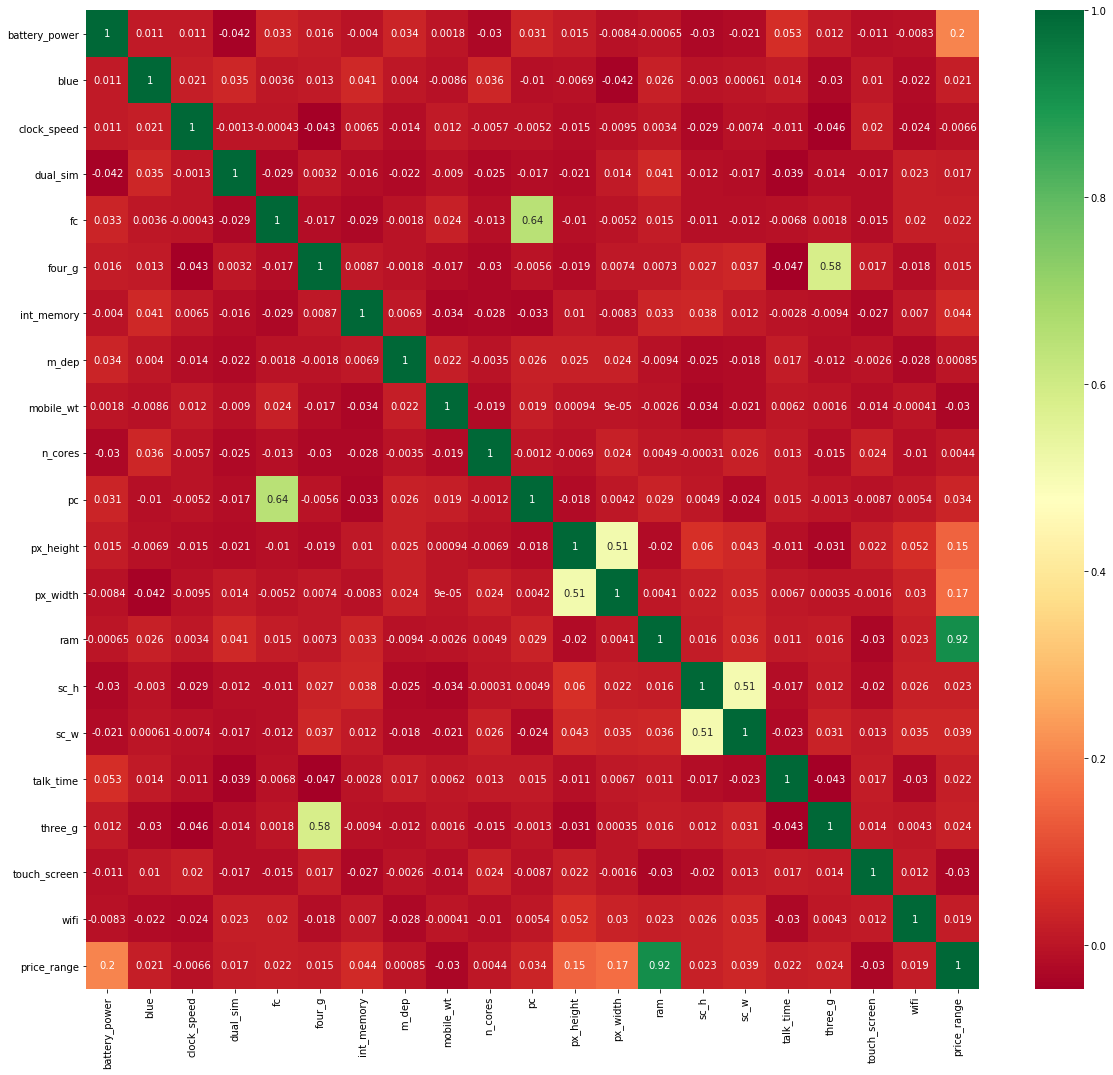

In [62]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)